# Extension: Results of copy stages in higher dimensions

In this notebook, we show results corresponding to the Two-stage Distance Copying Extension, described in Appendix D of the thesis report. Specifically, we present the fidelities and accuracies of the two-stage copies (SNN, MNN, and LNN) in the UCI high-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the hard copies. In addition, we show plots that describe the evolution of these metrics across different training dataset sizes, where computations were limited to 1,000,000 synthetic samples generated with Algorithm 2 and 600 seconds.

As a remark, all metrics and plots shown in this notebook have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d
from ucimlrepo import fetch_ucirepo
from scipy.stats import qmc

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Breast cancer dataset

### Black box 1: Random Forest classifier

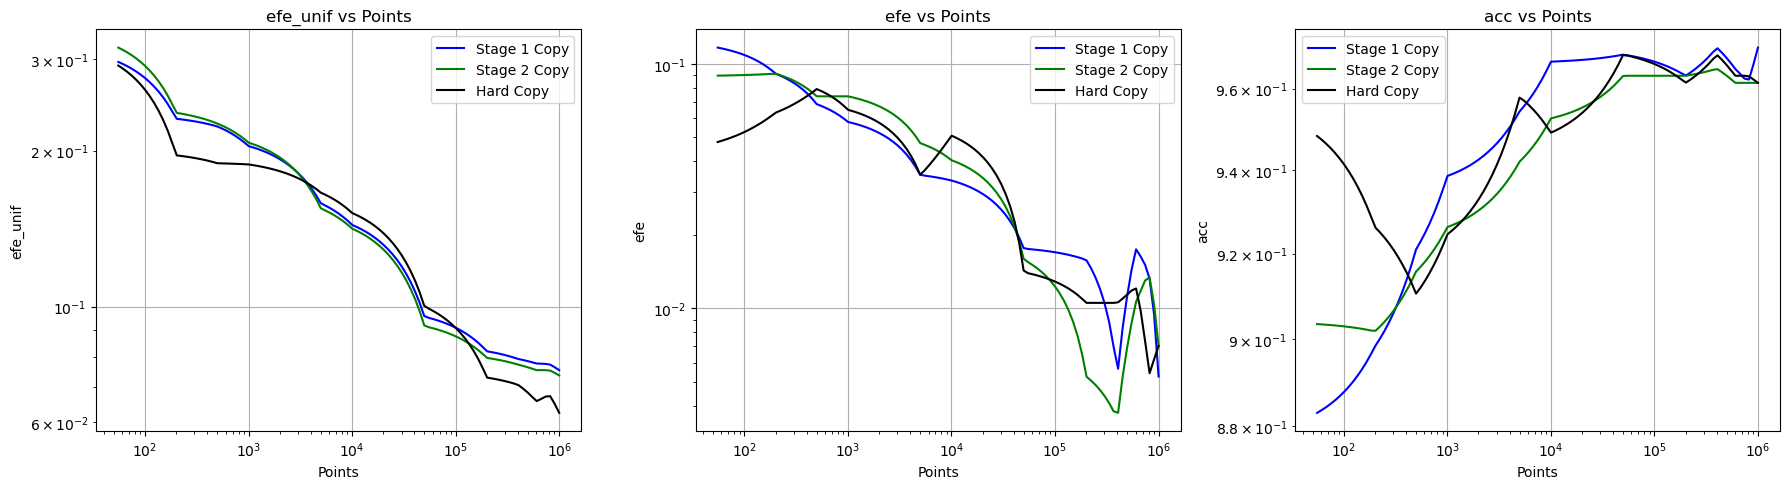

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9702   0.0043 0.0053   0.0043      0.0754        0.0023 1000000.0000   0.0000
 Model 2 0.9614   0.0043 0.0070   0.0066      0.0737        0.0017 1000000.0000   0.0000
 Model 3 0.9614   0.0070 0.0070   0.0066      0.0624        0.0045 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [3]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_1_1_seed")
print(summary_df.to_string(index=False))

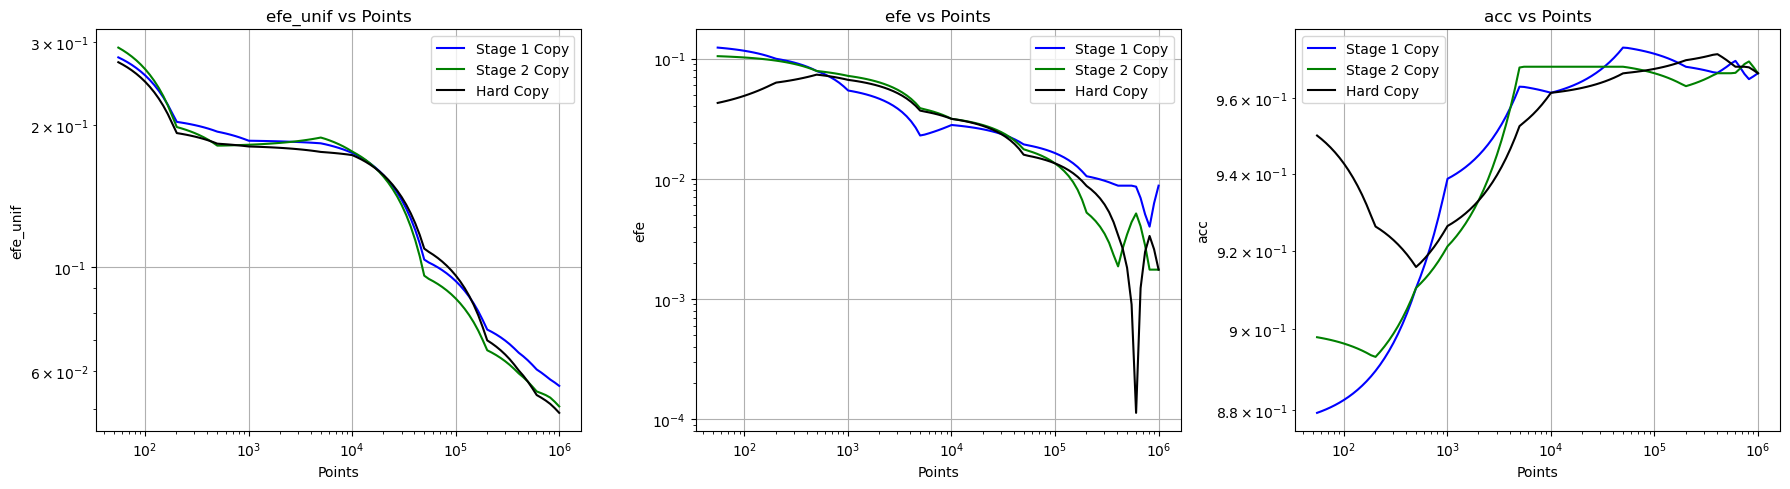

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9667   0.0086 0.0088   0.0055      0.0559        0.0004 1000000.0000   0.0000
 Model 2 0.9667   0.0086 0.0018   0.0035      0.0505        0.0013 1000000.0000   0.0000
 Model 3 0.9667   0.0066 0.0018   0.0035      0.0490        0.0018 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [4]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_1_2_seed")
print(summary_df.to_string(index=False))

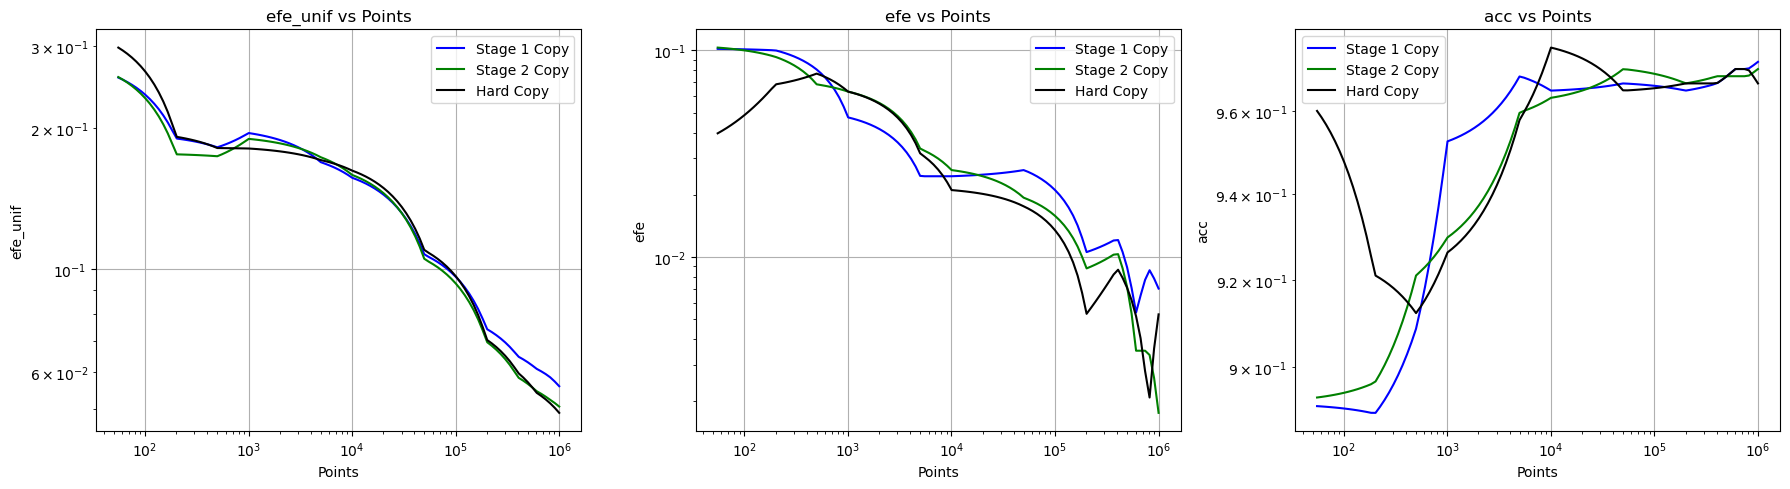

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9719   0.0102 0.0070   0.0035      0.0559        0.0008 1000000.0000   0.0000
 Model 2 0.9702   0.0089 0.0018   0.0035      0.0506        0.0011 1000000.0000   0.0000
 Model 3 0.9667   0.0035 0.0053   0.0070      0.0490        0.0018 1000000.0000   0.0000
Blackbox 0.9684   0.0089                                                                


In [5]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_1_3_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

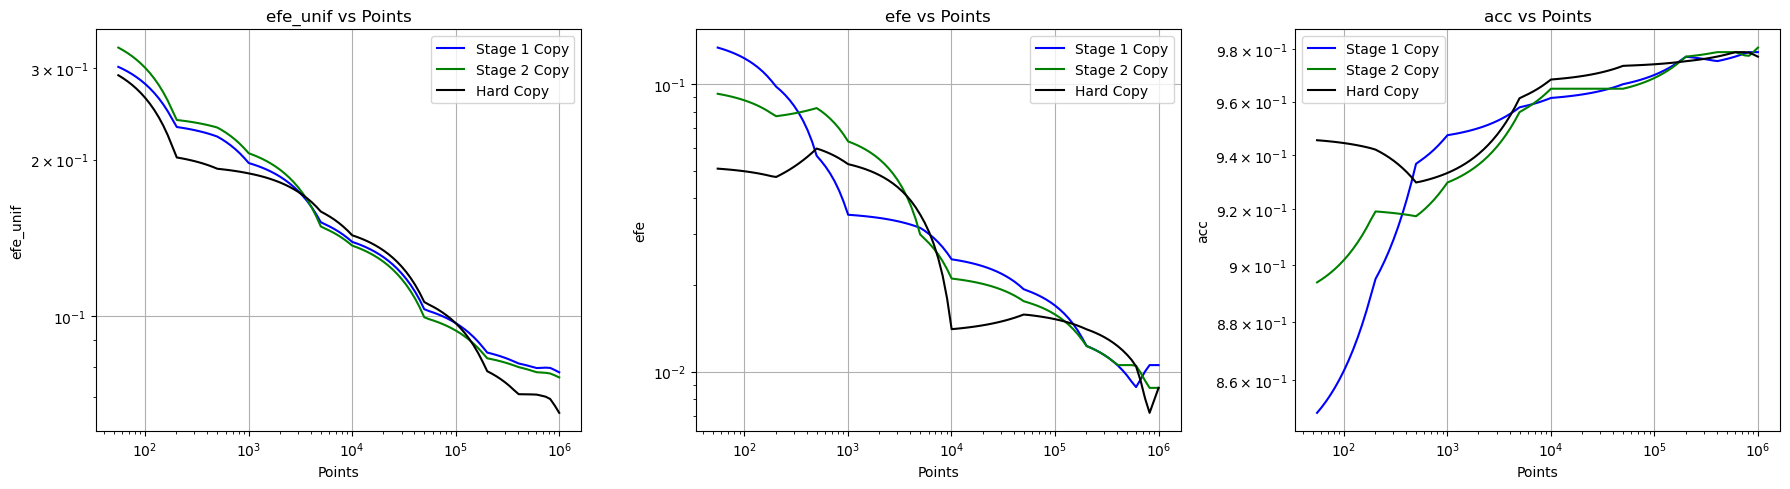

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9789   0.0119 0.0105   0.0066      0.0781        0.0047 1000000.0000   0.0000
 Model 2 0.9807   0.0116 0.0088   0.0055      0.0764        0.0043 1000000.0000   0.0000
 Model 3 0.9772   0.0131 0.0088   0.0000      0.0653        0.0042 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [6]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_2_1_seed")
print(summary_df.to_string(index=False))

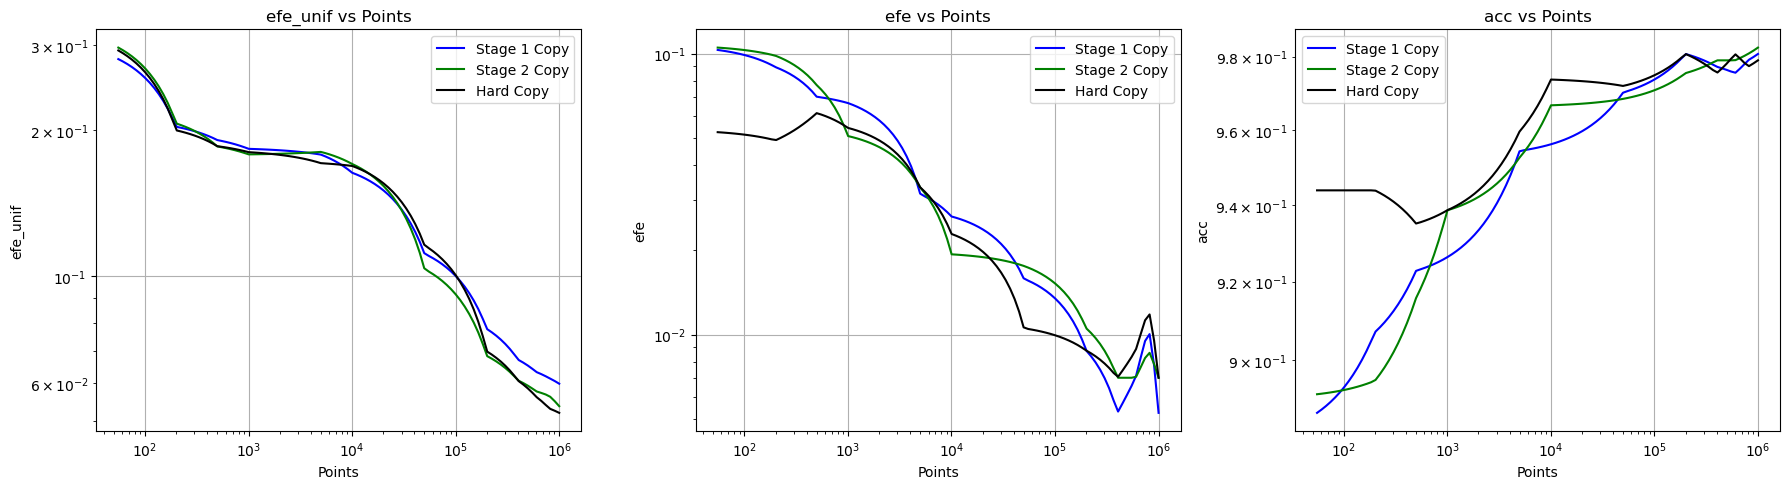

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9807   0.0086 0.0053   0.0043      0.0598        0.0054 1000000.0000   0.0000
 Model 2 0.9825   0.0111 0.0070   0.0035      0.0538        0.0037 1000000.0000   0.0000
 Model 3 0.9789   0.0089 0.0070   0.0035      0.0521        0.0032 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [7]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_2_2_seed")
print(summary_df.to_string(index=False))

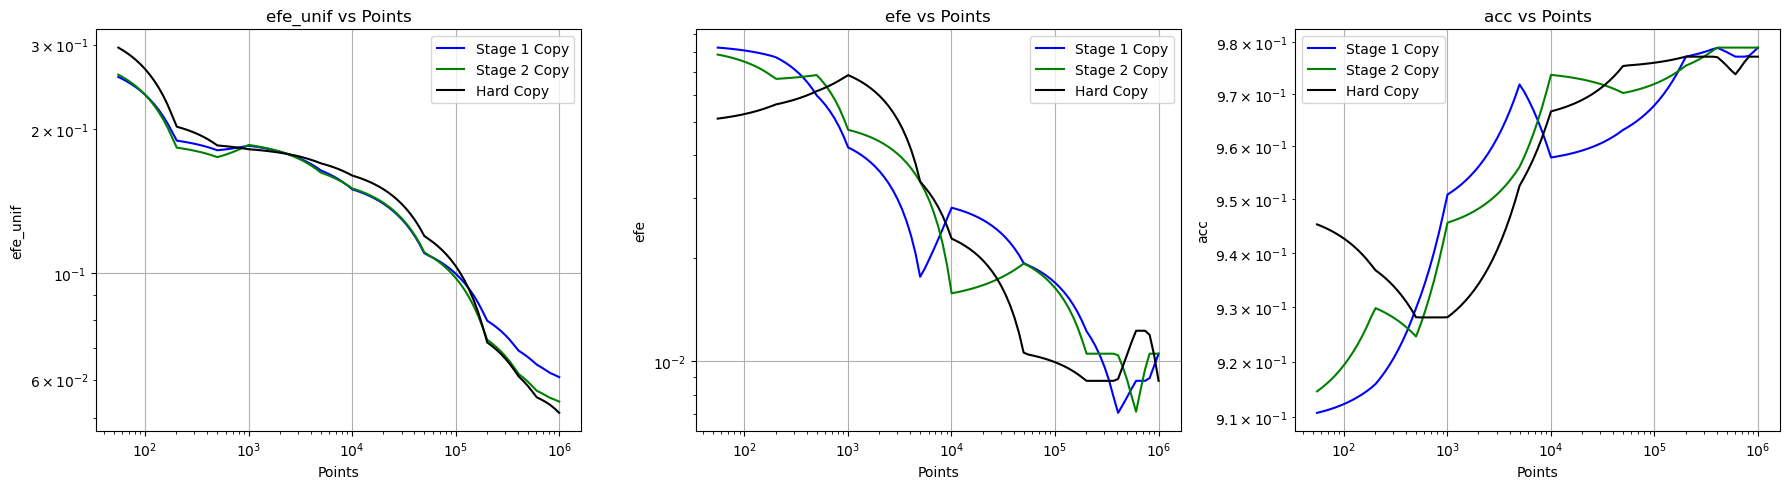

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9789   0.0119 0.0105   0.0035      0.0607        0.0063 1000000.0000   0.0000
 Model 2 0.9789   0.0119 0.0105   0.0035      0.0540        0.0042 1000000.0000   0.0000
 Model 3 0.9772   0.0089 0.0088   0.0055      0.0512        0.0039 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [8]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_2_3_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

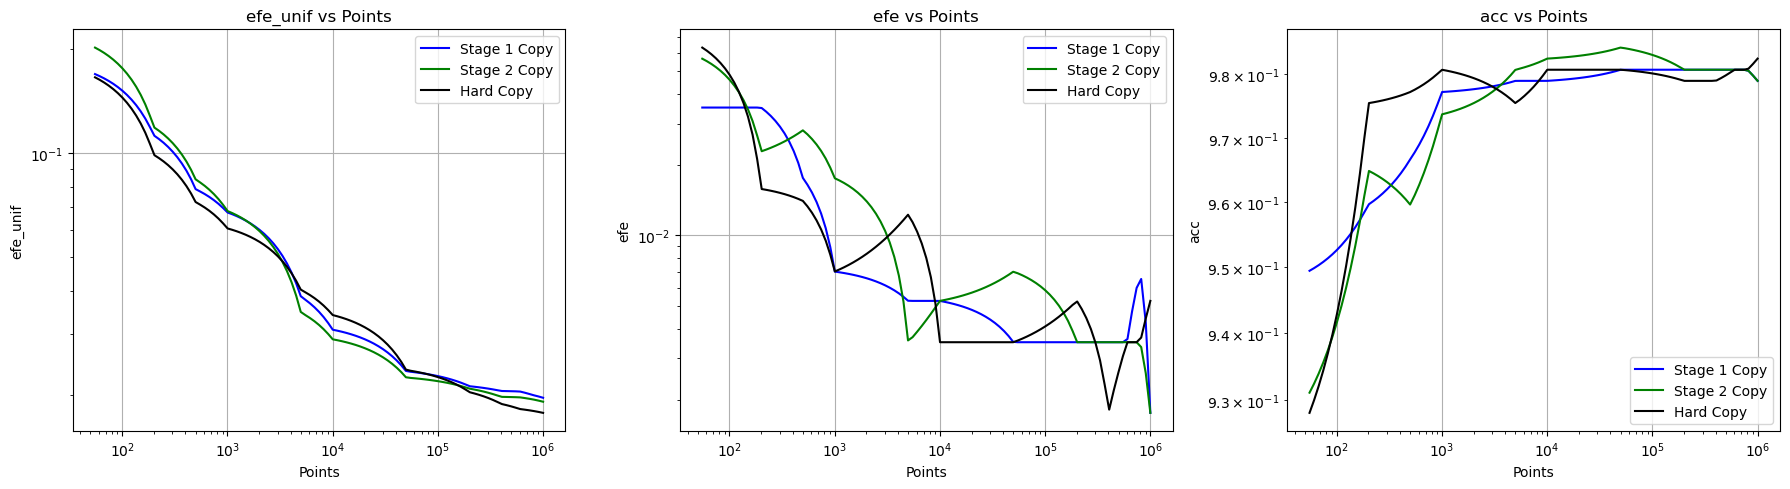

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9789   0.0070 0.0018   0.0035      0.0196        0.0010 1000000.0000   0.0000
 Model 2 0.9789   0.0070 0.0018   0.0035      0.0191        0.0010 1000000.0000   0.0000
 Model 3 0.9825   0.0078 0.0053   0.0070      0.0177        0.0017 1000000.0000   0.0000
Blackbox 0.9807   0.0086                                                                


In [9]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_3_1_seed")
print(summary_df.to_string(index=False))

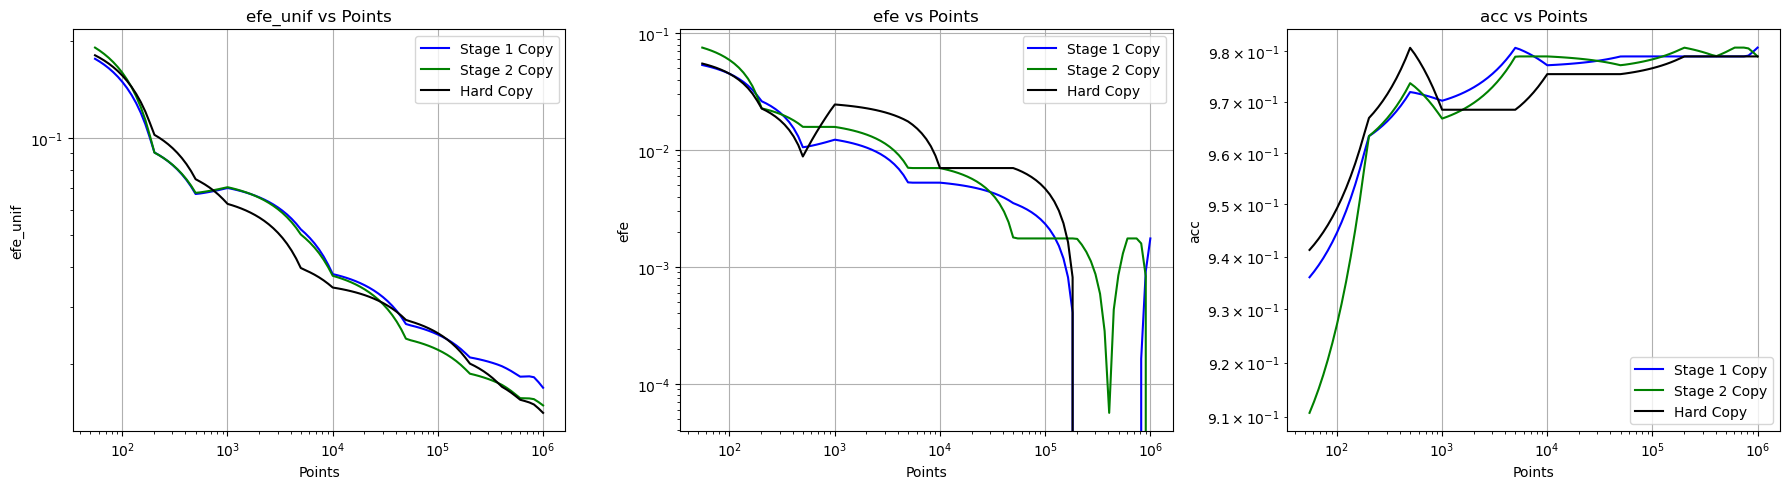

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9807   0.0066 0.0018   0.0035      0.0168        0.0012 1000000.0000   0.0000
 Model 2 0.9789   0.0070 0.0000   0.0000      0.0148        0.0010 1000000.0000   0.0000
 Model 3 0.9789   0.0070 0.0000   0.0000      0.0141        0.0009 1000000.0000   0.0000
Blackbox 0.9789   0.0070                                                                


In [10]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_3_2_seed")
print(summary_df.to_string(index=False))

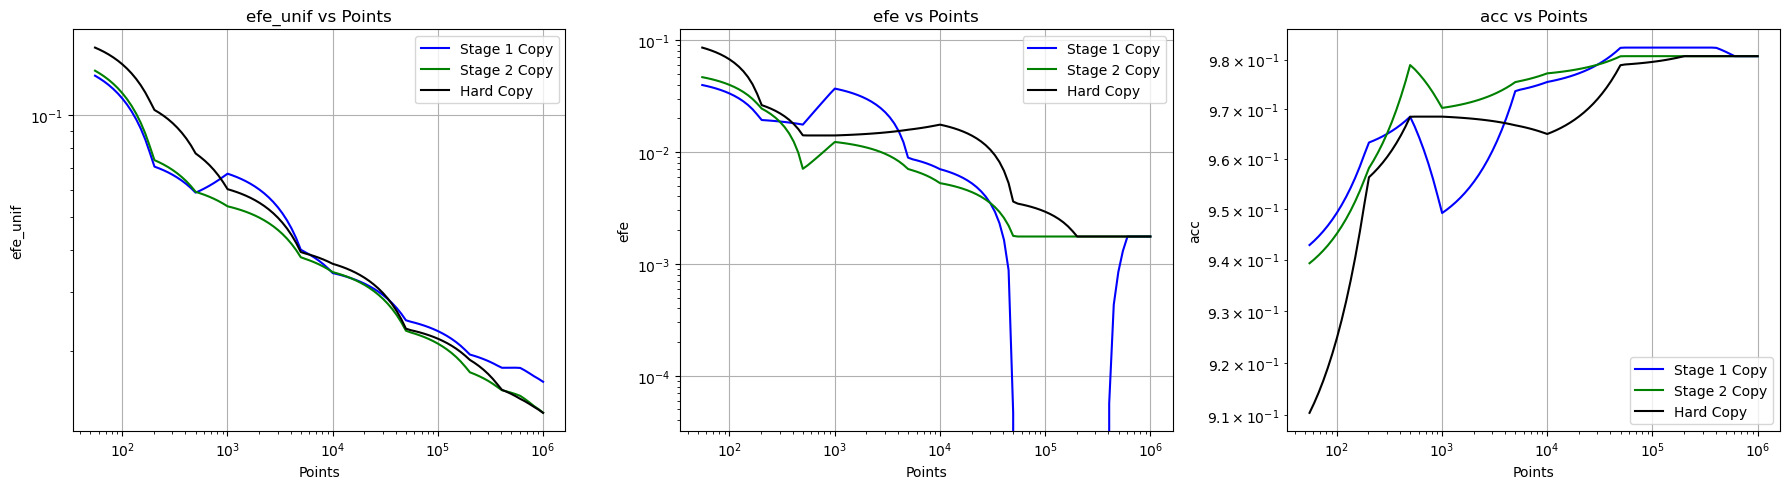

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9807   0.0066 0.0018   0.0035      0.0162        0.0020 1000000.0000   0.0000
 Model 2 0.9807   0.0066 0.0018   0.0035      0.0131        0.0014 1000000.0000   0.0000
 Model 3 0.9807   0.0066 0.0018   0.0035      0.0131        0.0019 1000000.0000   0.0000
Blackbox 0.9825   0.0078                                                                


In [11]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS4_3_3_seed")
print(summary_df.to_string(index=False))

## Rice dataset

### Black box 1: Random Forest classifier

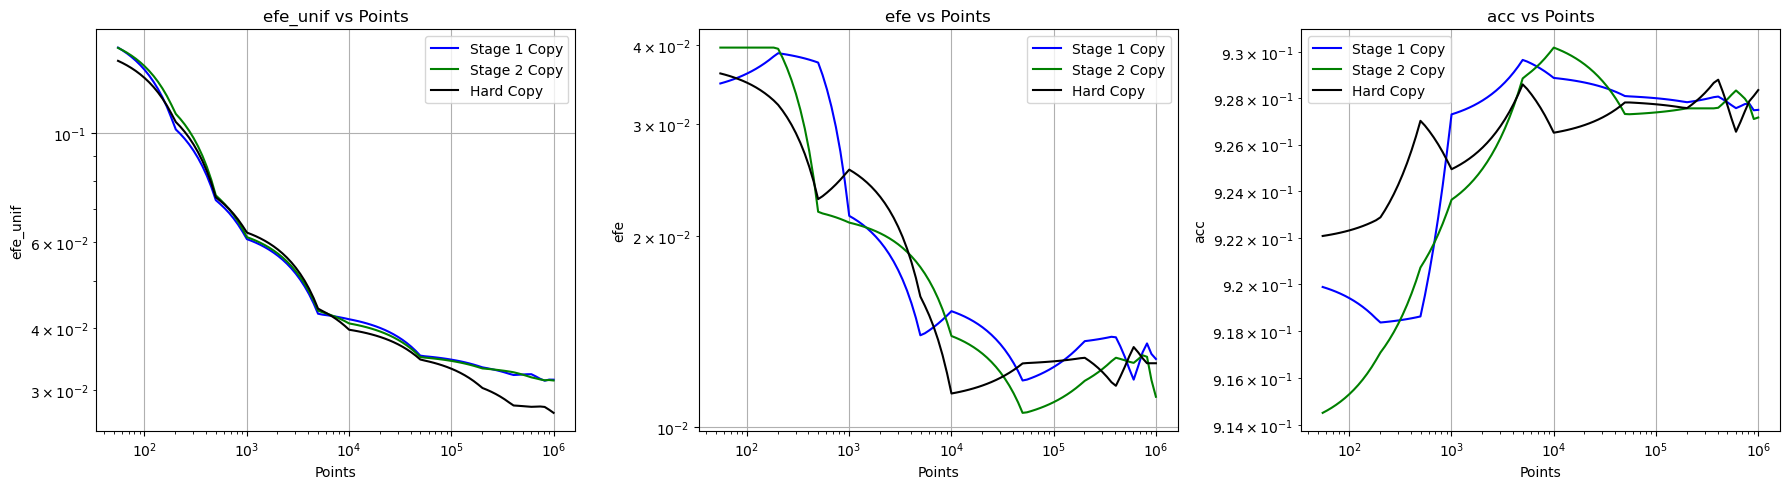

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.9273   0.0062 0.0126   0.0046      0.0316        0.0034  992004.0000 15992.0000
 Model 2 0.9268   0.0067 0.0110   0.0044      0.0315        0.0039  992004.0000 15992.0000
 Model 3 0.9283   0.0042 0.0126   0.0049      0.0269        0.0035 1000000.0000     0.0000
Blackbox 0.9257   0.0039                                                                  


In [12]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_1_1_seed")
print(summary_df.to_string(index=False))

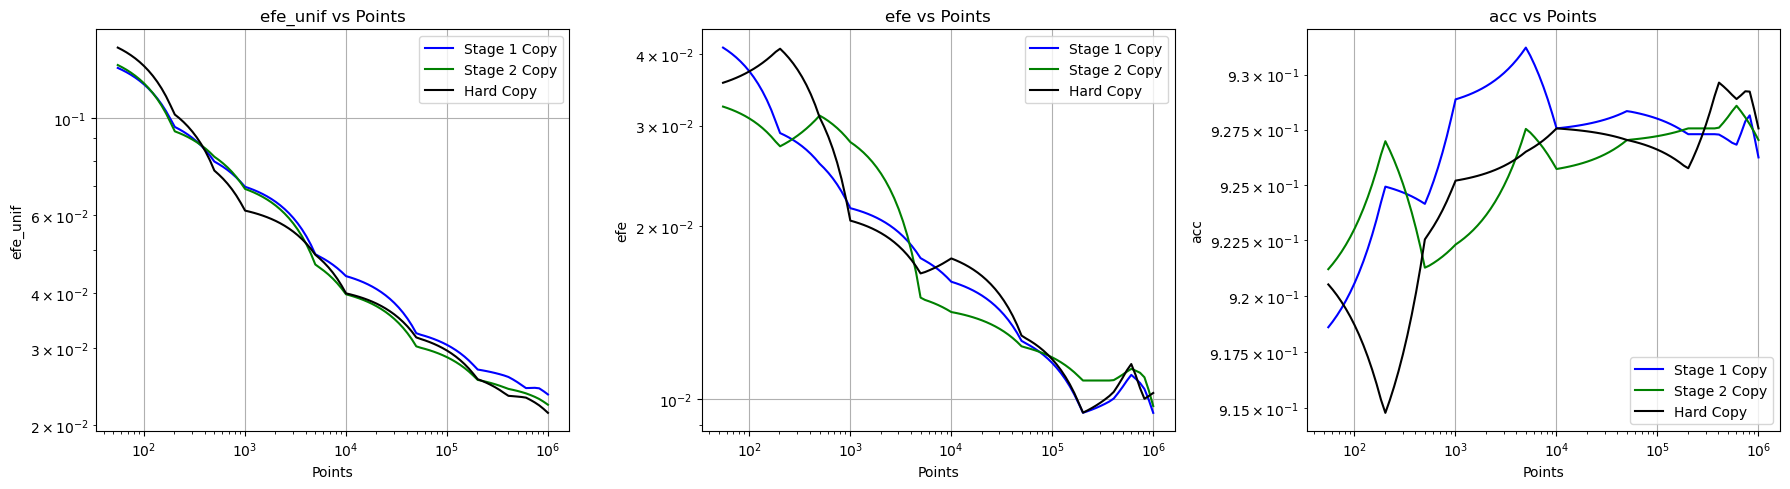

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9262   0.0049 0.0094   0.0034      0.0235        0.0022 1000000.0000   0.0000
 Model 2 0.9270   0.0058 0.0097   0.0037      0.0223        0.0025 1000000.0000   0.0000
 Model 3 0.9276   0.0068 0.0102   0.0038      0.0214        0.0024 1000000.0000   0.0000
Blackbox 0.9257   0.0039                                                                


In [13]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_1_2_seed")
print(summary_df.to_string(index=False))

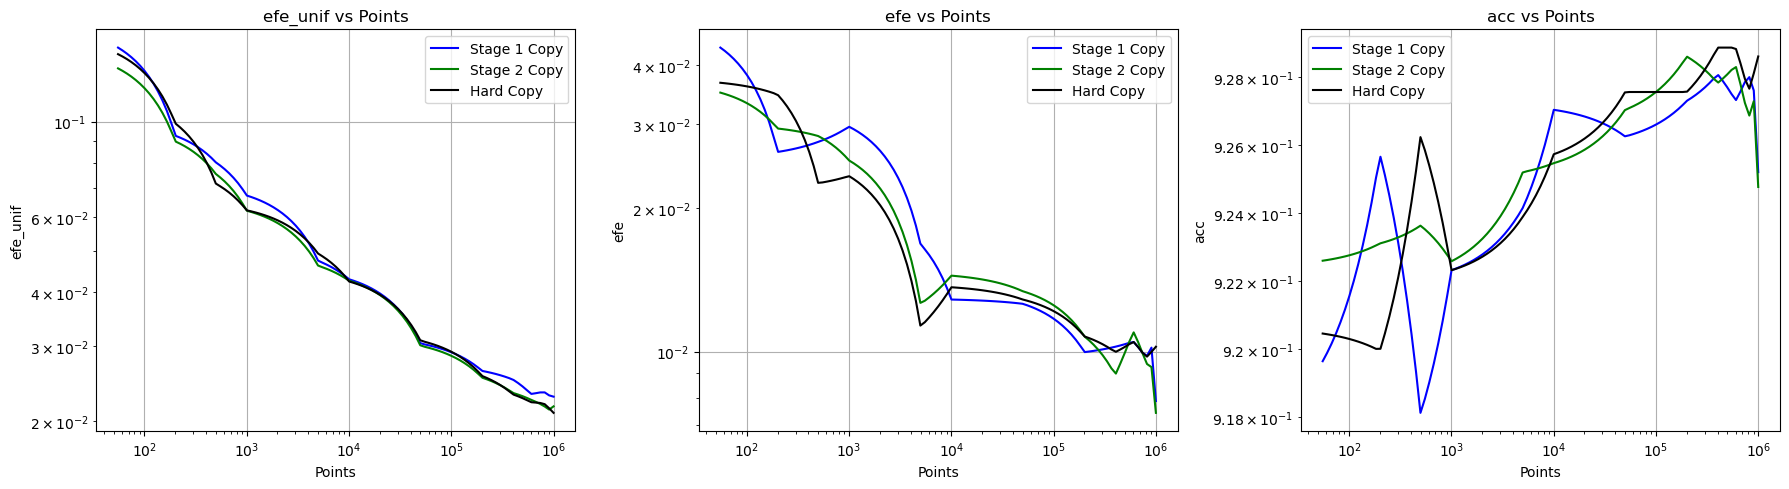

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.9273   0.0051 0.0105   0.0049      0.0227        0.0025  984008.0000 19586.1200
 Model 2 0.9276   0.0054 0.0092   0.0025      0.0210        0.0023  984008.0000 19586.1200
 Model 3 0.9286   0.0046 0.0102   0.0049      0.0209        0.0020 1000000.0000     0.0000
Blackbox 0.9257   0.0039                                                                  


In [14]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_1_3_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

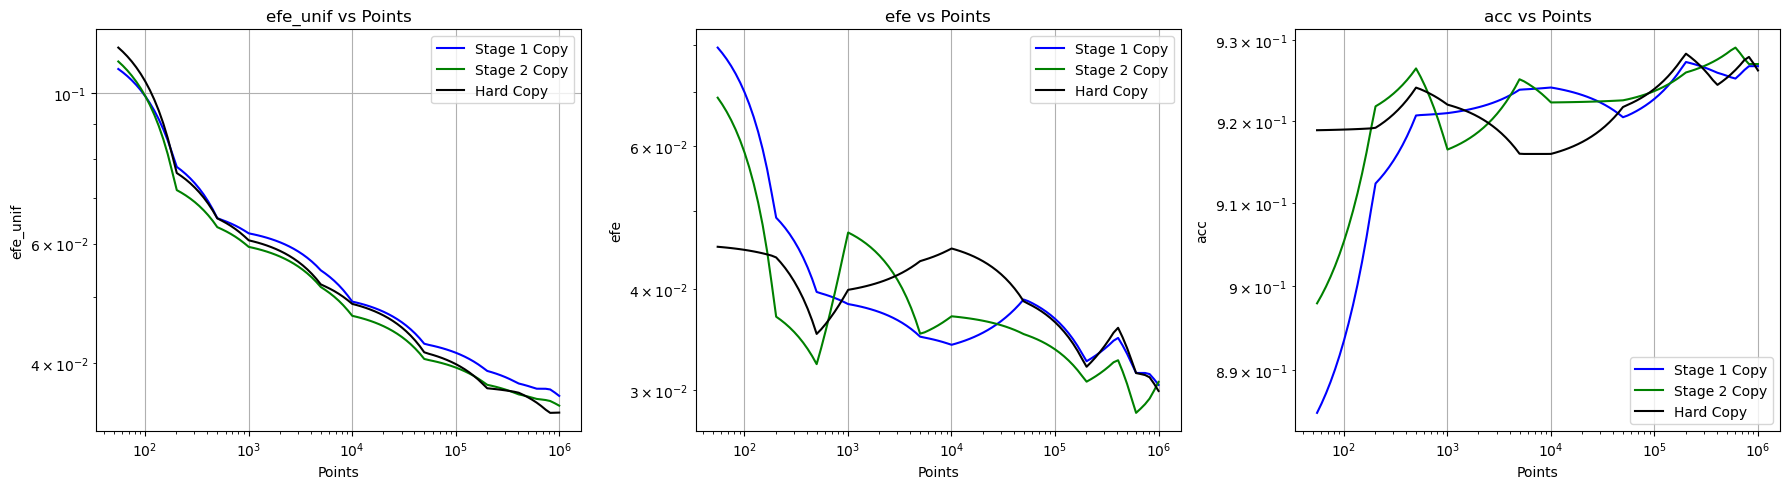

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9268   0.0048 0.0304   0.0028      0.0358        0.0032 1000000.0000   0.0000
 Model 2 0.9270   0.0032 0.0307   0.0027      0.0346        0.0026 1000000.0000   0.0000
 Model 3 0.9262   0.0066 0.0299   0.0041      0.0338        0.0019 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [15]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_2_1_seed")
print(summary_df.to_string(index=False))

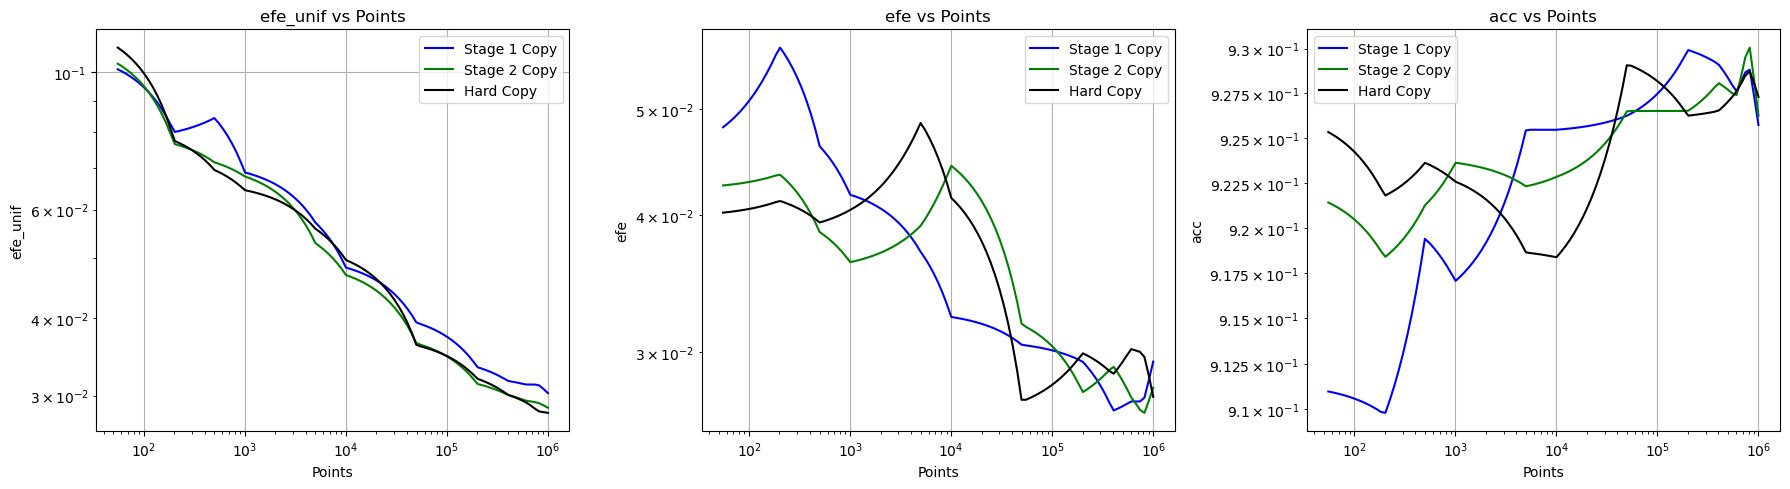

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9257   0.0051 0.0294   0.0029      0.0303        0.0023 1000000.0000   0.0000
 Model 2 0.9262   0.0052 0.0278   0.0023      0.0287        0.0022 1000000.0000   0.0000
 Model 3 0.9273   0.0054 0.0273   0.0047      0.0281        0.0013 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [16]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_2_2_seed")
print(summary_df.to_string(index=False))

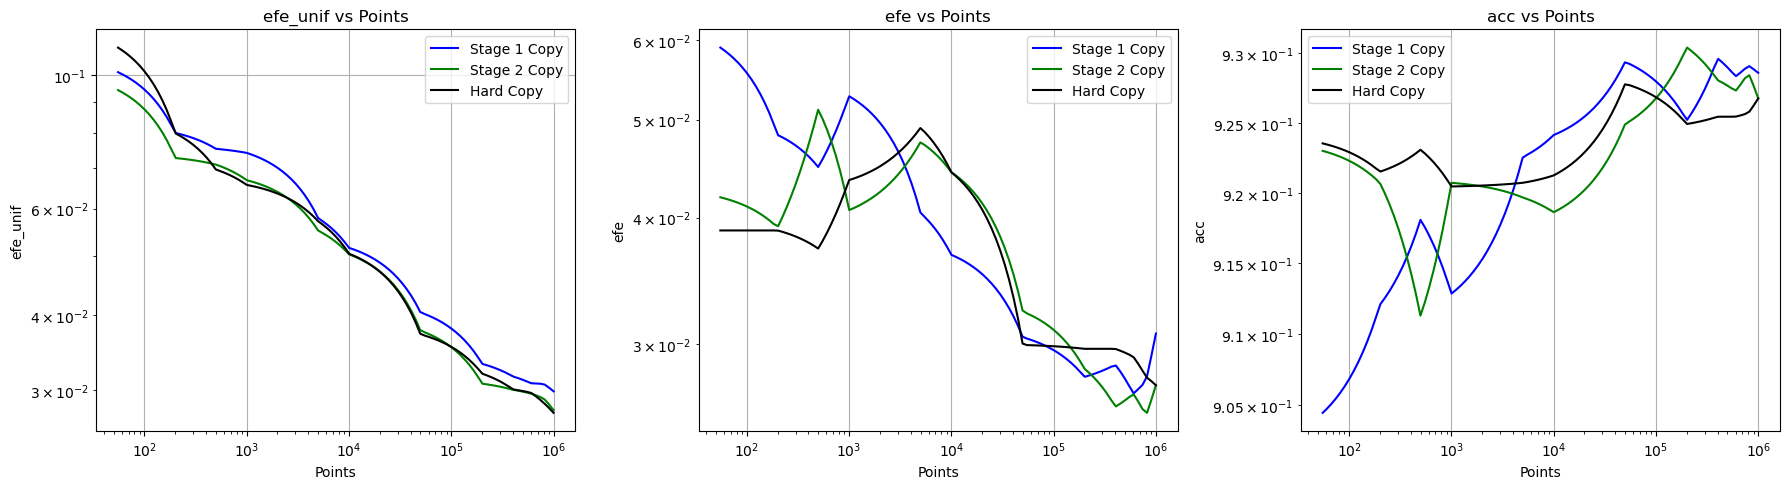

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9286   0.0080 0.0307   0.0052      0.0299        0.0023 1000000.0000   0.0000
 Model 2 0.9268   0.0063 0.0273   0.0028      0.0278        0.0019 1000000.0000   0.0000
 Model 3 0.9268   0.0037 0.0273   0.0042      0.0275        0.0019 1000000.0000   0.0000
Blackbox 0.9226   0.0034                                                                


In [17]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_2_3_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

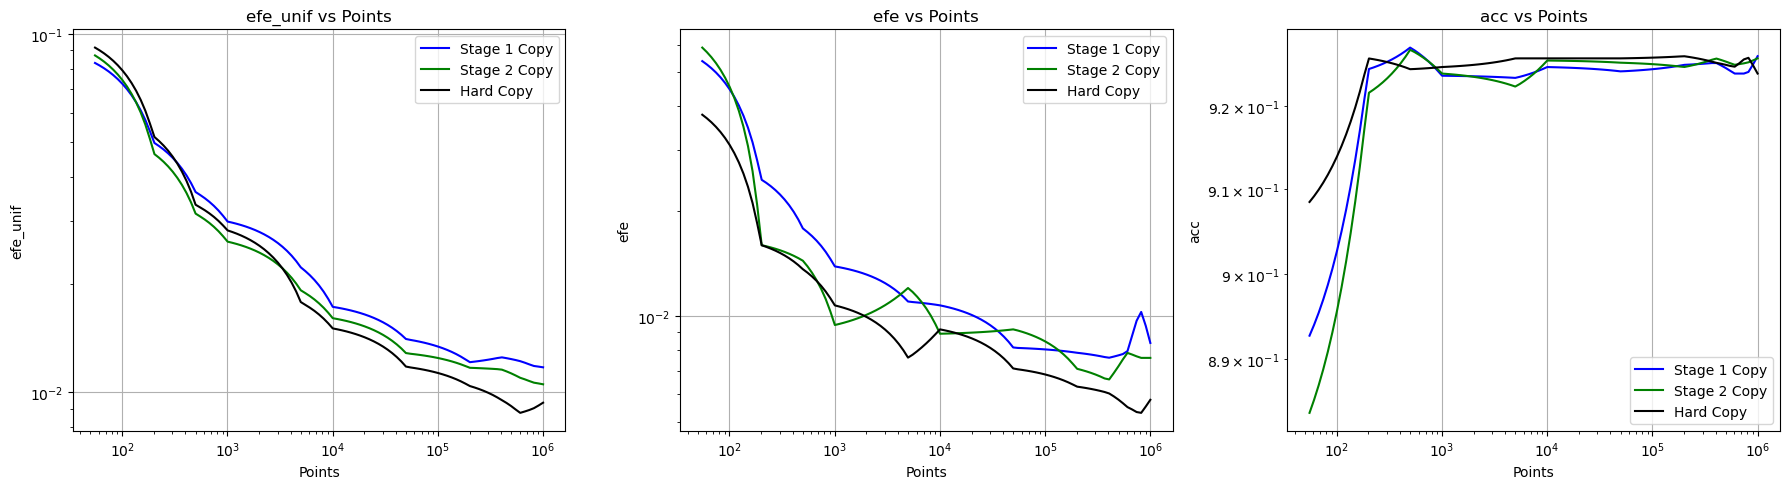

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9260   0.0061 0.0084   0.0033      0.0117        0.0019 1000000.0000   0.0000
 Model 2 0.9257   0.0058 0.0076   0.0028      0.0105        0.0013 1000000.0000   0.0000
 Model 3 0.9239   0.0054 0.0058   0.0028      0.0094        0.0025 1000000.0000   0.0000
Blackbox 0.9260   0.0052                                                                


In [18]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_3_1_seed")
print(summary_df.to_string(index=False))

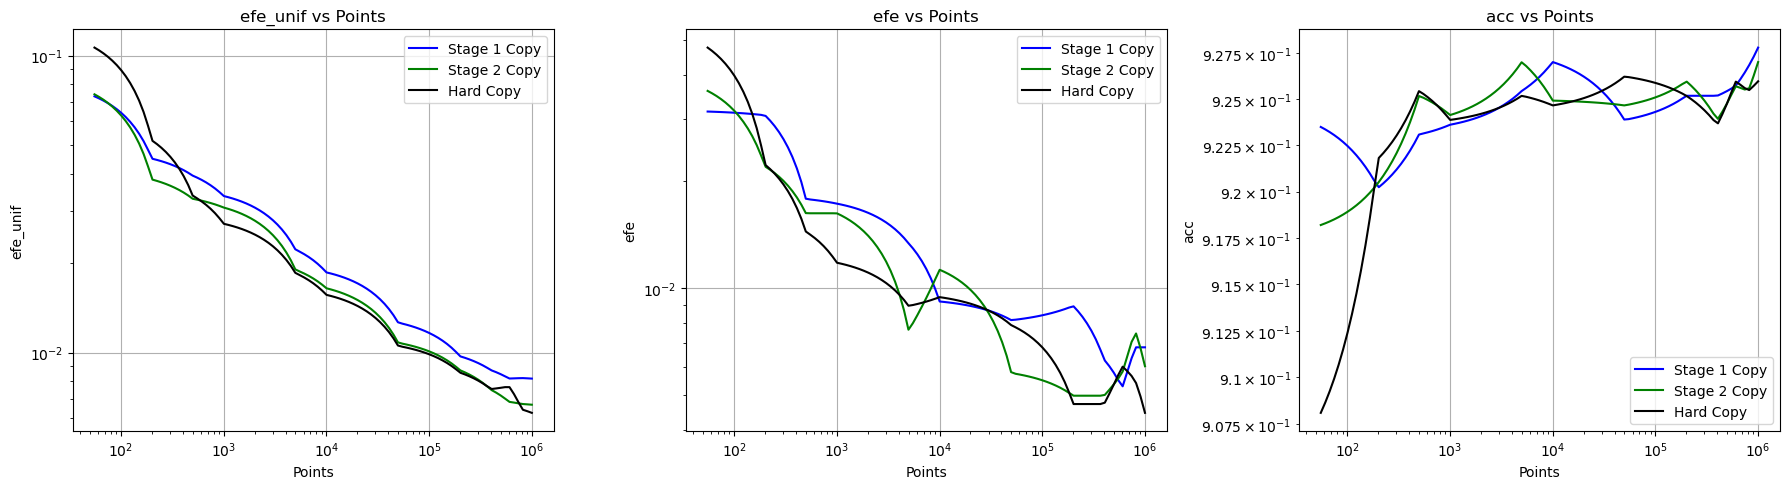

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9278   0.0054 0.0068   0.0029      0.0082        0.0009 1000000.0000   0.0000
 Model 2 0.9270   0.0050 0.0060   0.0023      0.0067        0.0003 1000000.0000   0.0000
 Model 3 0.9260   0.0050 0.0045   0.0043      0.0063        0.0005 1000000.0000   0.0000
Blackbox 0.9241   0.0046                                                                


In [19]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_3_2_seed")
print(summary_df.to_string(index=False))

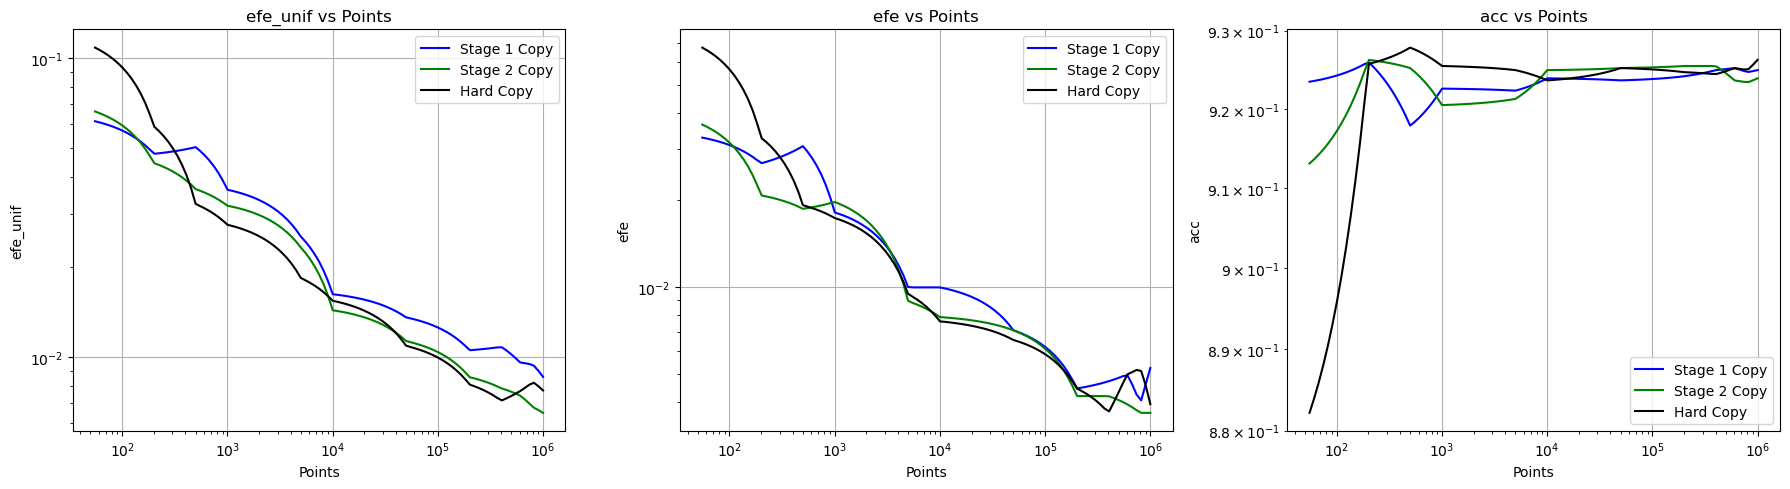

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9249   0.0067 0.0052   0.0023      0.0086        0.0011 1000000.0000   0.0000
 Model 2 0.9239   0.0063 0.0037   0.0013      0.0065        0.0005 1000000.0000   0.0000
 Model 3 0.9262   0.0059 0.0039   0.0022      0.0077        0.0009 1000000.0000   0.0000
Blackbox 0.9228   0.0052                                                                


In [20]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS5_3_3_seed")
print(summary_df.to_string(index=False))

## Connectionist bench (mines vs rocks) dataset

### Black box 1: Random Forest classifier

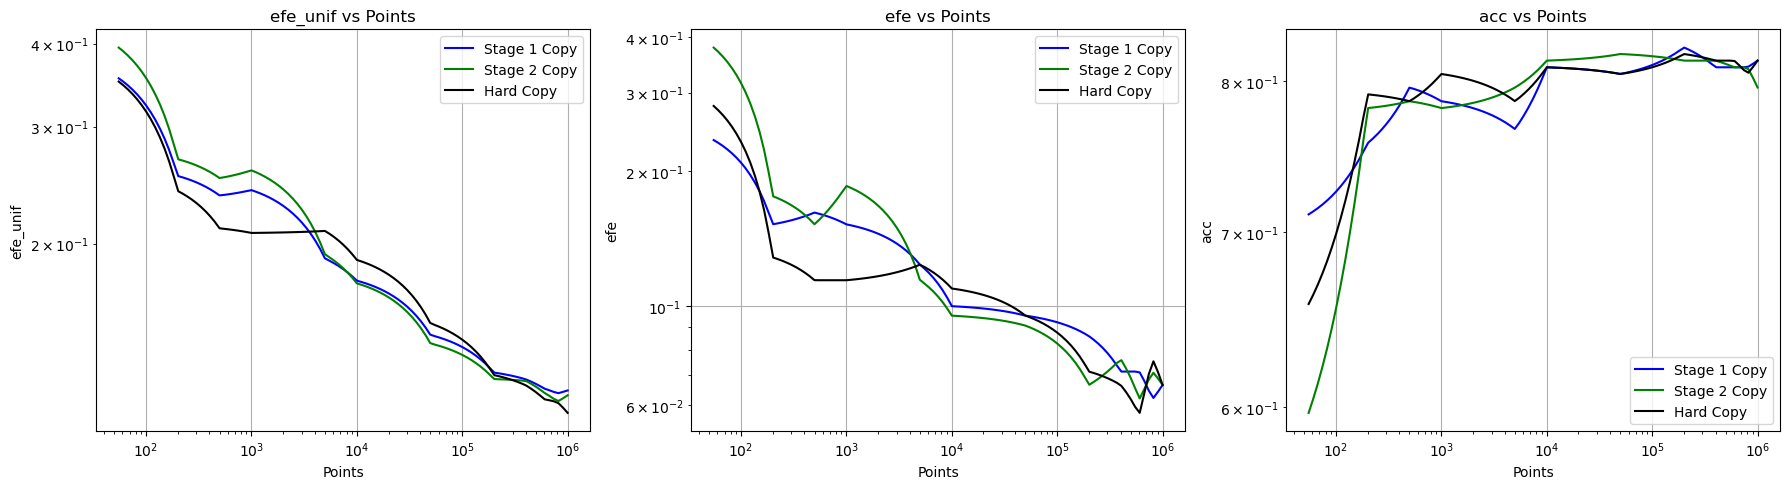

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8143   0.0610 0.0667   0.0278      0.1202        0.0065 1000000.0000   0.0000
 Model 2 0.7952   0.0595 0.0667   0.0233      0.1182        0.0063 1000000.0000   0.0000
 Model 3 0.8143   0.0610 0.0667   0.0278      0.1113        0.0088 1000000.0000   0.0000
Blackbox 0.8143   0.0350                                                                


In [21]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_1_1_seed")
print(summary_df.to_string(index=False))

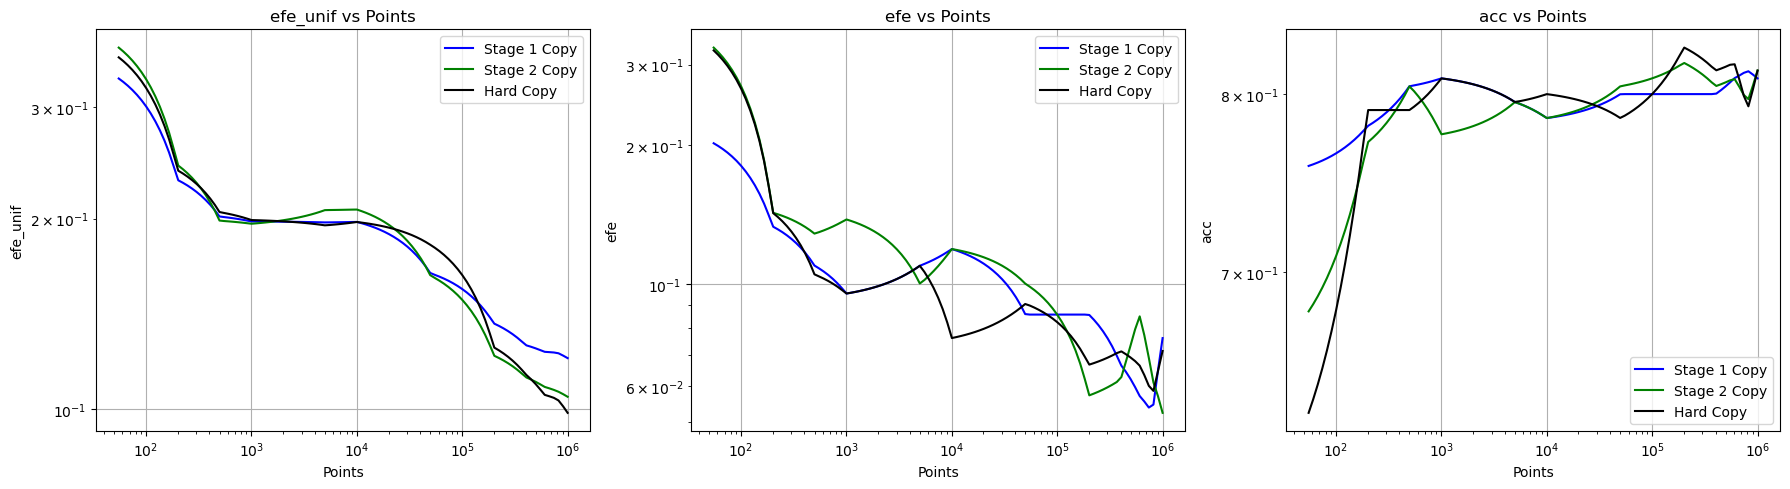

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8095   0.0621 0.0762   0.0316      0.1203        0.0071 1000000.0000   0.0000
 Model 2 0.8143   0.0628 0.0524   0.0178      0.1045        0.0056 1000000.0000   0.0000
 Model 3 0.8143   0.0628 0.0714   0.0213      0.0985        0.0050 1000000.0000   0.0000
Blackbox 0.8190   0.0323                                                                


In [22]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_1_2_seed")
print(summary_df.to_string(index=False))

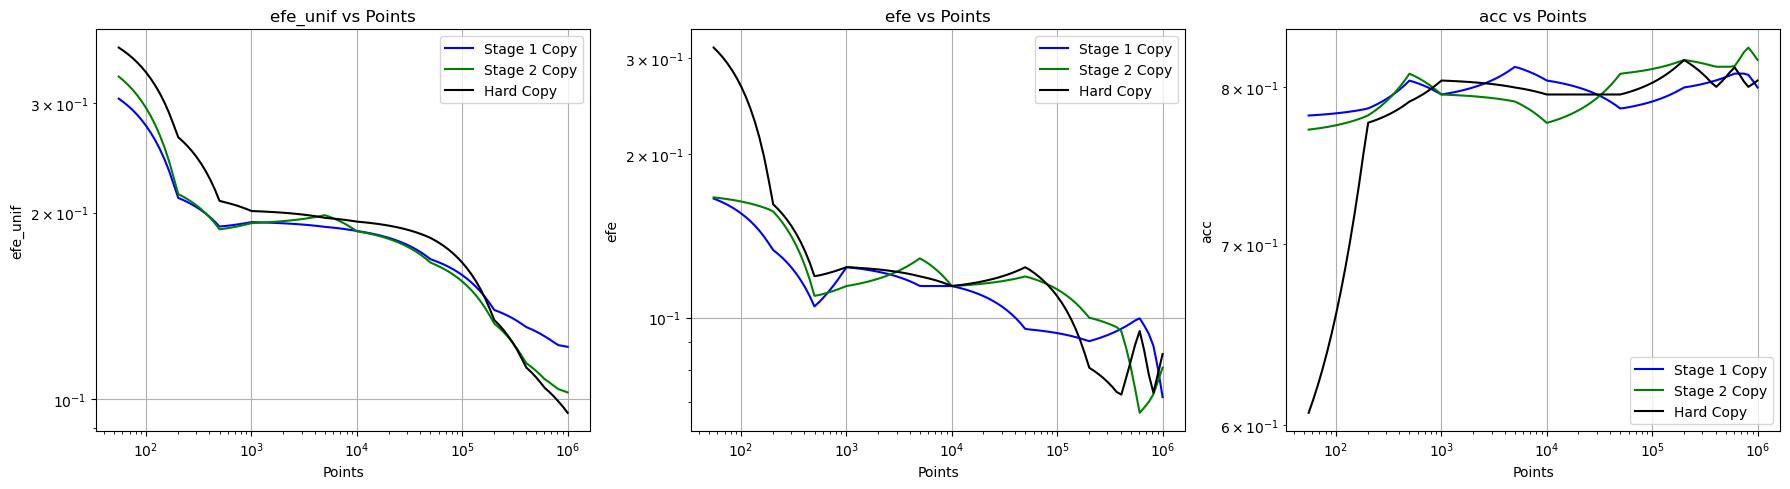

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8000   0.0614 0.0714   0.0261      0.1215        0.0024 1000000.0000   0.0000
 Model 2 0.8190   0.0535 0.0810   0.0243      0.1025        0.0011 1000000.0000   0.0000
 Model 3 0.8048   0.0591 0.0857   0.0356      0.0951        0.0027 1000000.0000   0.0000
Blackbox 0.8143   0.0350                                                                


In [23]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_1_3_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

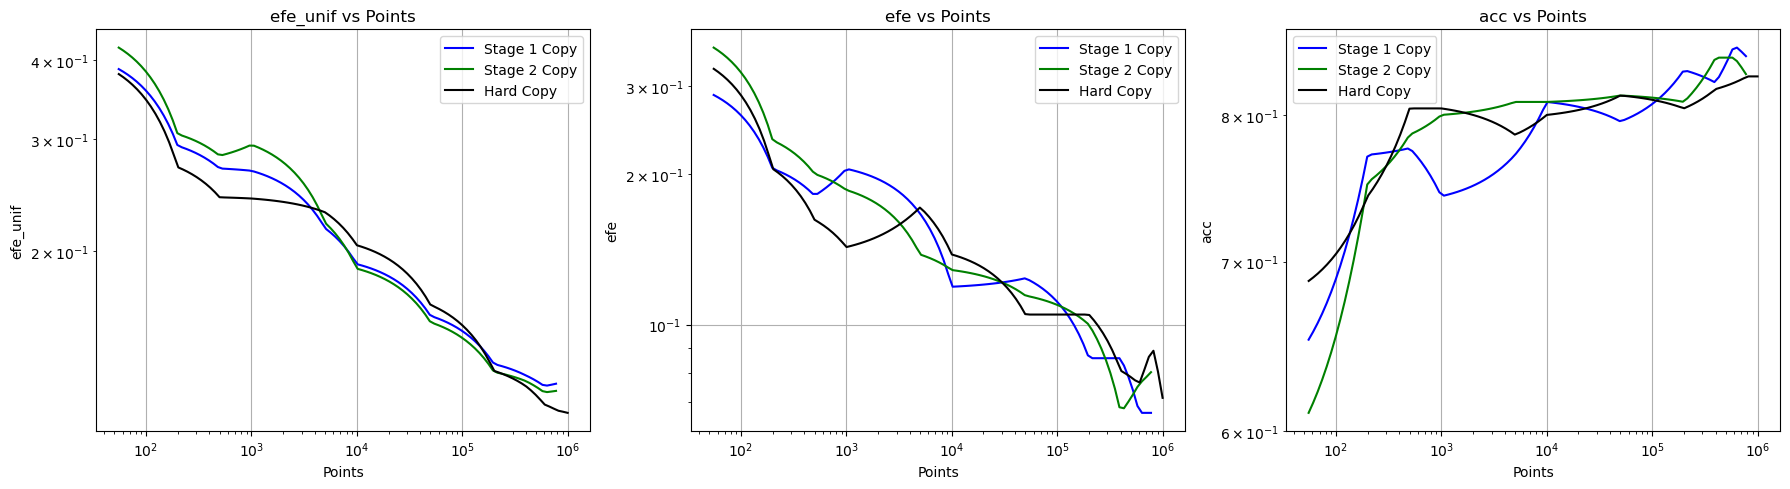

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.8238   0.0243 0.0952   0.0452      0.1208        0.0092  835300.0000 18748.6960
 Model 2 0.8286   0.0278 0.0810   0.0442      0.1181        0.0080  835300.0000 18748.6960
 Model 3 0.8286   0.0350 0.0714   0.0426      0.1109        0.0094 1000000.0000     0.0000
Blackbox 0.8714   0.0667                                                                  


In [24]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_2_1_seed")
print(summary_df.to_string(index=False))

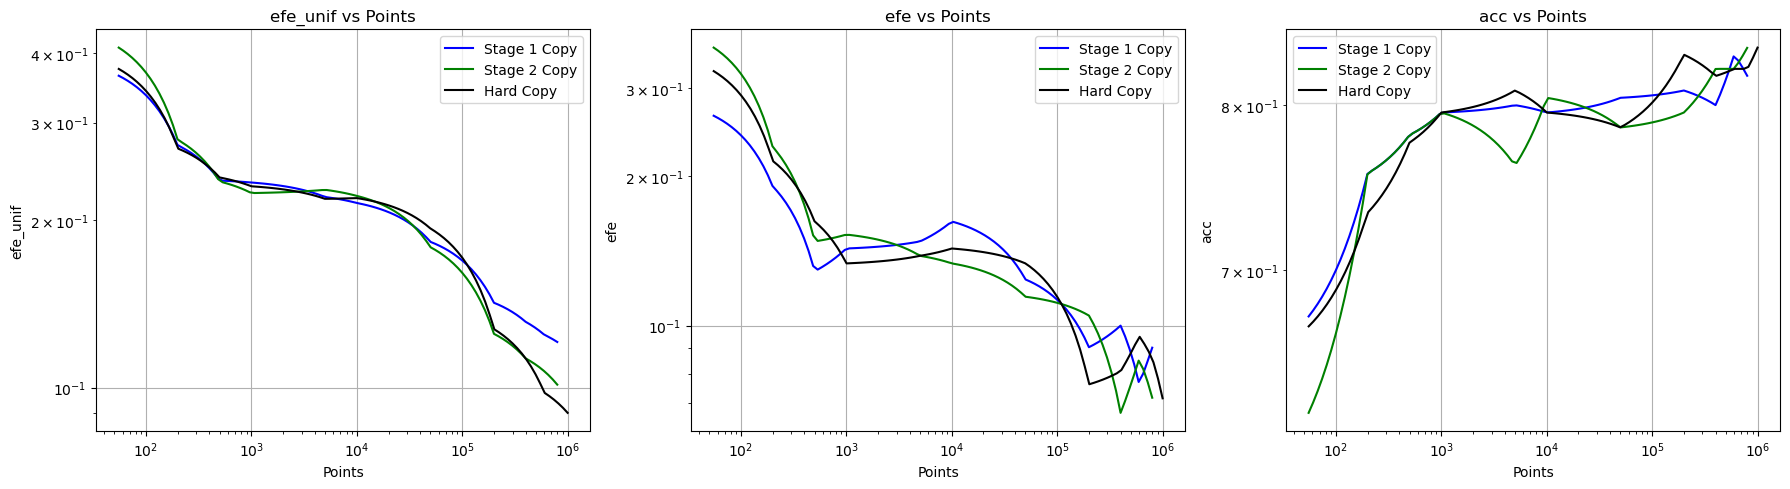

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.8238   0.0415 0.0857   0.0490      0.1212        0.0162  848020.0000 16000.0000
 Model 2 0.8238   0.0323 0.0857   0.0387      0.1021        0.0116  848020.0000 16000.0000
 Model 3 0.8381   0.0278 0.0714   0.0301      0.0901        0.0104 1000000.0000     0.0000
Blackbox 0.8714   0.0667                                                                  


In [25]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_2_2_seed")
print(summary_df.to_string(index=False))

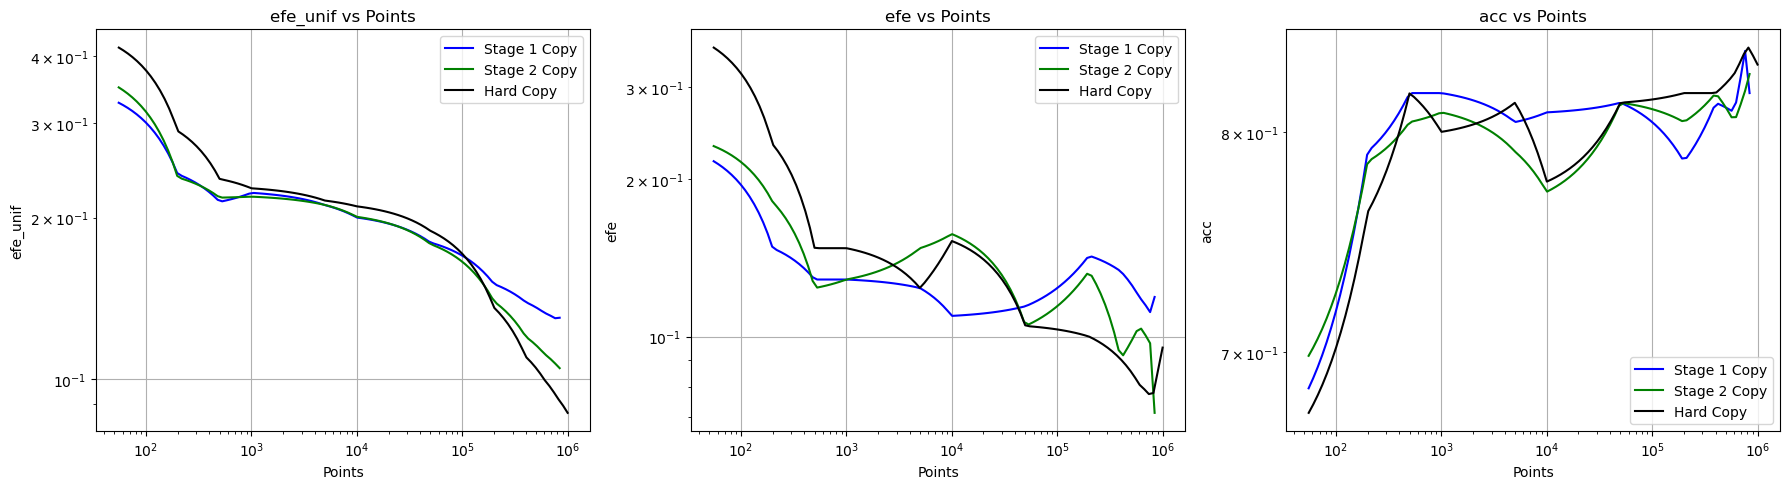

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8190   0.0683 0.1190   0.0369      0.1302        0.0145  840020.0000   0.0000
 Model 2 0.8286   0.0278 0.0714   0.0261      0.1049        0.0123  840020.0000   0.0000
 Model 3 0.8333   0.0398 0.0952   0.0452      0.0866        0.0073 1000000.0000   0.0000
Blackbox 0.8714   0.0667                                                                


In [26]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_2_3_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

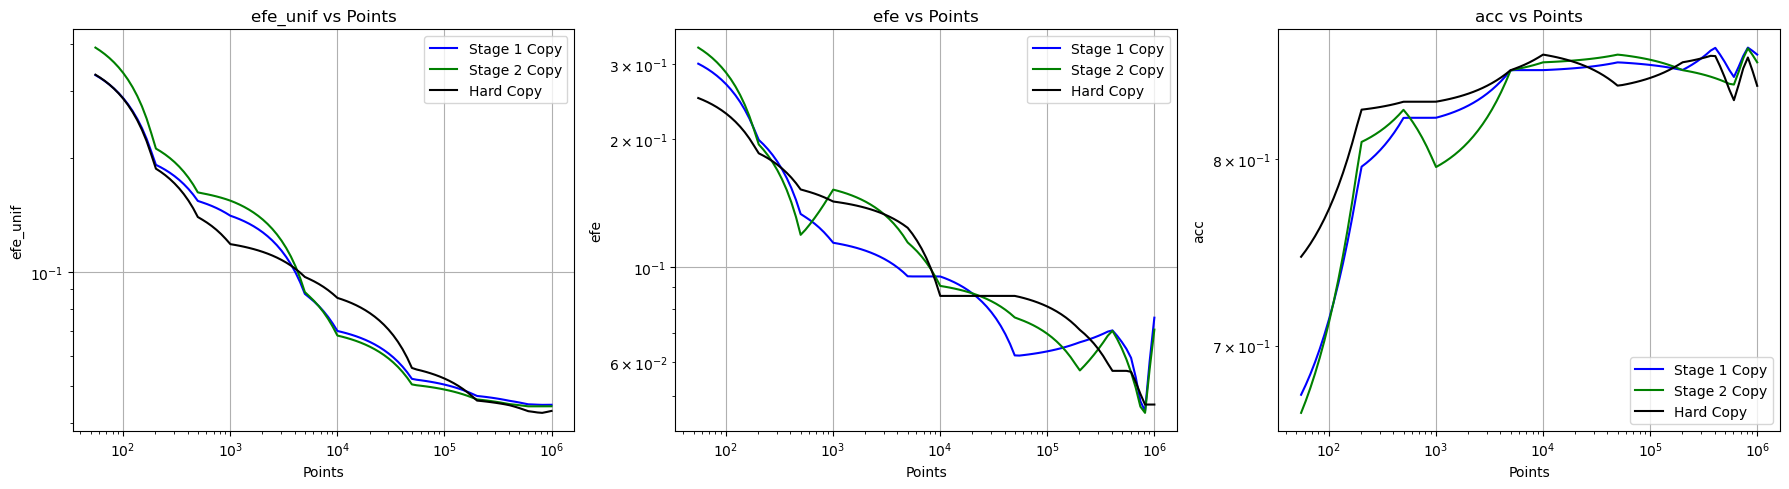

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8619   0.0350 0.0762   0.0233      0.0446        0.0016 1000000.0000   0.0000
 Model 2 0.8571   0.0213 0.0714   0.0337      0.0442        0.0021 1000000.0000   0.0000
 Model 3 0.8429   0.0323 0.0476   0.0337      0.0430        0.0019 1000000.0000   0.0000
Blackbox 0.8905   0.0415                                                                


In [27]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_3_1_seed")
print(summary_df.to_string(index=False))

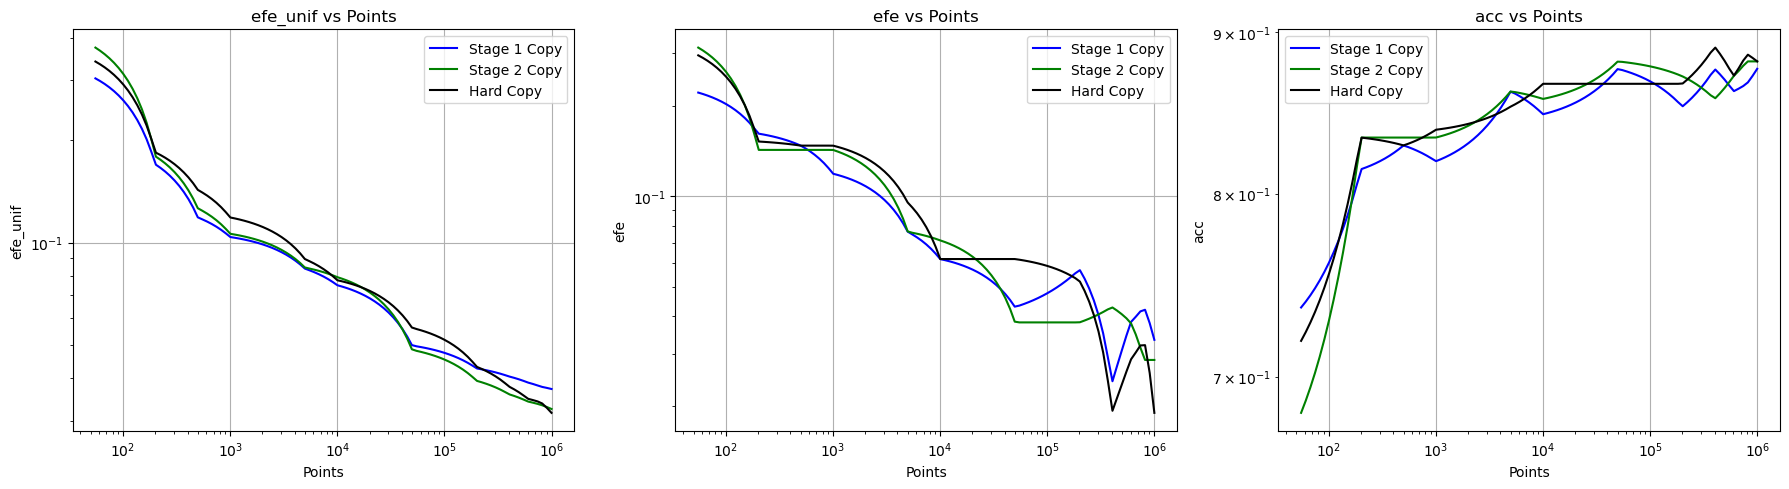

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8762   0.0410 0.0333   0.0117      0.0372        0.0010 1000000.0000   0.0000
 Model 2 0.8810   0.0337 0.0286   0.0095      0.0325        0.0011 1000000.0000   0.0000
 Model 3 0.8810   0.0452 0.0190   0.0278      0.0316        0.0012 1000000.0000   0.0000
Blackbox 0.8905   0.0490                                                                


In [28]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_3_2_seed")
print(summary_df.to_string(index=False))

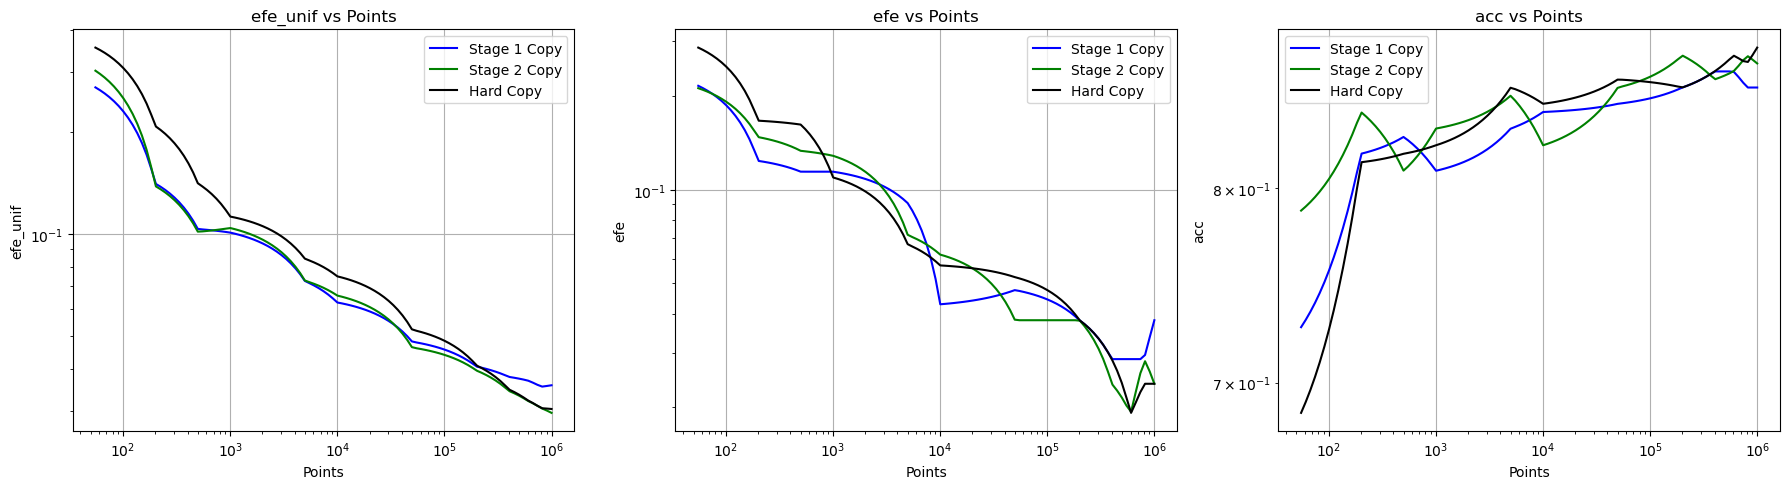

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8571   0.0522 0.0381   0.0243      0.0357        0.0031 1000000.0000   0.0000
 Model 2 0.8714   0.0490 0.0238   0.0151      0.0296        0.0027 1000000.0000   0.0000
 Model 3 0.8810   0.0499 0.0238   0.0151      0.0304        0.0031 1000000.0000   0.0000
Blackbox 0.8762   0.0486                                                                


In [29]:
# Combined plots averaging all files
summary_df = plot_all_results_ext("../results", "extension_results_DS6_3_3_seed")
print(summary_df.to_string(index=False))